In [1]:
!pip install umap
!pip install -U sentence-transformers
!pip install hdbscan
!pip install transformers
!pip install torch torchvision torchaudio
!pip install umap-learn
!pip install gensim
!pip install nltk
!pip install vaderSentiment

  Using cached umap-0.1.1.tar.gz (3.2 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=5c9d54b543ffc44e622db44ffcfcaf059ed1ce1503ba385c346853d9a077db41
  Stored in directory: /Users/camerondeardon/Library/Caches/pip/wheels/82/d8/73/e9eb3334baaad795ff0278363ff1aca7568bdf2793e452a527
Successfully built umap
  Obtaining dependency information for sentence-transformers from https://files.pythonhosted.org/packages/58/4b/922436953394e1bfda05e4bf1fe0e80f609770f256c59a9df7a9254f3e0d/sentence_transformers-3.0.1-py3-none-any.whl.metadata
  Using cached sentence_transformers-3.0.1-py3-none-any.whl.metadata (10 kB)
  Obtaining dependency information for transformers<5.0.0,>=4.34.0 from https://files.pythonhosted.org/packages/62/c0/810e741a6244c0f004be40ccb96486d072f042eabbd4d7e8aa02b81ca1eb/transformers-4.44.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.1 MB/s eta 0:00:00
  Obtain

In [2]:
!pip install contractions

  Obtaining dependency information for contractions from https://files.pythonhosted.org/packages/bb/e4/725241b788963b460ce0118bfd5c505dd3d1bdd020ee740f9f39044ed4a7/contractions-0.1.73-py2.py3-none-any.whl.metadata
  Using cached contractions-0.1.73-py2.py3-none-any.whl.metadata (1.2 kB)
  Obtaining dependency information for textsearch>=0.0.21 from https://files.pythonhosted.org/packages/e2/0f/6f08dd89e9d71380a369b1f5b6c97a32d62fc9cfacc1c5b8329505b9e495/textsearch-0.0.24-py2.py3-none-any.whl.metadata
  Using cached textsearch-0.0.24-py2.py3-none-any.whl.metadata (1.2 kB)
  Obtaining dependency information for anyascii from https://files.pythonhosted.org/packages/4f/7b/a9a747e0632271d855da379532b05a62c58e979813814a57fa3b3afeb3a4/anyascii-0.3.2-py3-none-any.whl.metadata
  Using cached anyascii-0.3.2-py3-none-any.whl.metadata (1.5 kB)
  Obtaining dependency information for pyahocorasick from https://files.pythonhosted.org/packages/f2/8b/e6baa0246d3126d509d56f55f8f8be7b9cd914d8f87d1277f25d

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sentence_transformers import SentenceTransformer
import torch

import pandas as pd
import numpy as np
from tqdm import tqdm, trange
tqdm.pandas()

import seaborn as sns

from collections import Counter


import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, LdaModel
from gensim.corpora import Dictionary
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

import umap
import umap.umap_ as umap
import hdbscan
import math

import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import plotly.offline as offline
import plotly.graph_objects as go

# from google.colab import files
# from google.colab import auth
# auth.authenticate_user()
# import gspread
# from google.auth import default
# creds, _ = default()
# gc = gspread.authorize(creds)
# from gspread_dataframe import set_with_dataframe
# from google.colab import drive
# drive.mount('/content/gdrive')
# path = f'/content/gdrive/My Drive'


from IPython.display import HTML

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stopwords = set(stop_words)
nltk.download('punkt')
nltk.download('wordnet')

import contractions
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/camerondeardon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/camerondeardon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/camerondeardon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
embeddings_model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
def get_document_embeddings(preprocessed_texts):
    embeddings = embeddings_model.encode(preprocessed_texts)
    return embeddings
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words]
    bigrams = ngrams(words, 2)
    words += [' '.join(bigram) for bigram in bigrams]
    preprocessed_text = ' '.join(words)
    return preprocessed_text

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [6]:
founder_description = [
    "I'm looking for a skilled programmer to join my startup.",
    "Seeking a talented data scientist to cofound an AI company.",
    "Need a UX designer to partner with for a new app.",
    "Searching for a project manager to help lead a tech venture.",
    "Looking for a DevOps engineer to cofound a software company.",
    "Wanting to find a marketing expert to start an online business.",
    "In need of a financial advisor to cofound a fintech startup.",
    "Seeking a legal advisor to partner with for a legal tech firm.",
    "Looking for a healthcare professional to cofound a health tech company.",
    "Searching for an experienced sales manager to cofound a retail startup.",
    "Wanting a blockchain expert to start a cryptocurrency company.",
    "Seeking a machine learning specialist to cofound an analytics firm.",
    "Need a cybersecurity expert to start a security tech company.",
    "Looking for a cloud computing expert to cofound a SaaS company.",
    "Searching for an IoT specialist to start a smart device company.",
    "Wanting a mobile app developer to cofound an app-based business.",
    "Seeking a big data analyst to start a data analytics firm.",
    "Need an e-commerce specialist to cofound an online retail business.",
    "Looking for a product manager to partner with for a new venture.",
    "Searching for a biotech researcher to cofound a biotech startup.",
    "Wanting an AR/VR developer to start an augmented reality company.",
    "Seeking a digital marketing strategist to cofound a digital agency.",
    "Need an AI researcher to start an artificial intelligence company.",
    "Looking for a robotics engineer to cofound a robotics startup.",
    "Searching for a sustainability expert to start a green tech company.",
    "Wanting a web developer to cofound a web development business.",
    "Seeking a content creator to start a media company.",
    "Need a social media manager to cofound a social media agency.",
    "Looking for a logistics expert to start a logistics tech company.",
    "Searching for an educational technologist to cofound an edtech startup.",
    "Wanting a hardware engineer to start a hardware tech company.",
    "Seeking a game developer to cofound a gaming studio.",
    "Need a network engineer to start a networking tech company.",
    "Looking for a renewable energy expert to cofound a clean energy startup.",
    "Searching for an interior designer to start a design firm.",
    "Wanting an HR specialist to cofound a recruitment tech company.",
    "Seeking a drone technology expert to start a drone tech company.",
    "Need a quantum computing specialist to cofound a quantum tech firm.",
    "Looking for a speech recognition expert to start a voice tech company.",
    "Searching for an automotive engineer to cofound an auto tech startup.",
    "Wanting a smart home technology specialist to start a smart home company.",
    "Seeking a wearable tech developer to cofound a wearable tech startup.",
    "Need a cybersecurity policy expert to start a security consultancy.",
    "Looking for a privacy expert to cofound a privacy tech company.",
    "Searching for a supply chain specialist to start a supply chain tech company.",
    "Wanting an urban planner to cofound a smart city tech firm.",
    "Seeking a 3D printing specialist to start a 3D printing business.",
    "Need an aerospace engineer to cofound an aerospace tech company.",
    "Looking for a space technology expert to start a space tech startup.",
    "Searching for an automotive software developer to cofound an auto tech firm.",
    "Wanting a natural language processing expert to start an NLP company.",
    "Seeking a virtual reality expert to cofound a VR startup.",
    "Need a software architect to start a software development firm.",
    "Looking for an augmented reality specialist to cofound an AR startup.",
    "Searching for a computer vision expert to start a computer vision company.",
    "Wanting a database administrator to cofound a database tech firm.",
    "Seeking a telecommunications expert to start a telecom tech company.",
    "Need a cloud security expert to cofound a cloud security firm.",
    "Looking for a video game designer to start a game development studio.",
    "Searching for a fintech developer to cofound a fintech startup.",
    "Wanting a health informatics specialist to start a health tech company.",
    "Seeking a medical device developer to cofound a medtech startup.",
    "Need a construction tech expert to start a construction tech company.",
    "Looking for a transportation engineer to cofound a transportation tech firm.",
    "Searching for an e-learning specialist to start an edtech company.",
    "Wanting a wearable device developer to cofound a wearable tech firm.",
    "Seeking a hospitality tech expert to start a hospitality tech company.",
    "Need a retail tech specialist to cofound a retail tech startup.",
    "Looking for a real estate tech expert to start a real estate tech company.",
    "Searching for an agricultural tech specialist to cofound an agtech startup.",
    "Wanting a chemical engineer to start a chemical tech company.",
    "Seeking a materials scientist to cofound a materials tech startup.",
    "Need a geneticist to start a genetic tech company.",
    "Looking for a renewable energy engineer to cofound a renewable tech firm.",
    "Searching for a biometric technology expert to start a biometrics company.",
    "Wanting a voice recognition specialist to cofound a voice tech firm.",
    "Seeking a geospatial analyst to start a geospatial tech company.",
    "Need a market researcher to cofound a market research firm.",
    "Looking for a virtual assistant developer to start a virtual assistant company.",
    "Searching for a smart grid technology expert to cofound a smart grid startup.",
    "Wanting a business intelligence specialist to start a BI company.",
    "Seeking a neuromorphic computing expert to cofound a neuromorphic tech firm.",
    "Need a photonics engineer to start a photonics tech company.",
    "Looking for a satellite technology expert to cofound a satellite tech startup.",
    "Searching for an environmental engineer to start an environmental tech company.",
    "Wanting a gene editing specialist to cofound a gene editing firm.",
    "Seeking a personalized medicine expert to start a personalized medicine company.",
    "Need a marine biotechnologist to cofound a marine biotech startup.",
    "Looking for a sports technology expert to start a sports tech company.",
    "Searching for a smart textiles developer to cofound a smart textiles firm.",
    "Wanting a pharmaceutical scientist to start a pharma tech company.",
    "Seeking a VR content creator to cofound a VR content studio.",
    "Need an AI ethics specialist to start an AI ethics consultancy.",
    "Looking for a financial technology expert to cofound a fintech firm.",
    "Searching for a green building specialist to start a green building company.",
    "Wanting an innovation strategist to cofound an innovation consultancy.",
    "Seeking a public health technologist to start a public health tech firm.",
    "Need a clinical research scientist to cofound a clinical research startup.",
    "Looking for a veterinary technologist to start a veterinary tech company.",
    "Searching for a mental health tech specialist to cofound a mental health startup.",
    "Wanting a hydrology expert to start a water tech company.",
    "Seeking a computational biologist to cofound a computational biology firm.",
    "Need a nuclear engineer to start a nuclear tech company.",
    "Looking for a creative technologist to cofound a creative tech startup.",
    "Searching for a data privacy advocate to start a data privacy firm.",
    "Wanting a personal finance advisor to cofound a personal finance tech company.",
    "Seeking a disaster recovery specialist to start a disaster recovery firm.",
    "Need a telemedicine expert to cofound a telemedicine startup.",
    "Looking for a cloud solutions architect to start a cloud solutions company.",
    "Searching for a proptech developer to cofound a proptech startup.",
    "Wanting a healthcare data analyst to start a healthcare data firm.",
    "Seeking a behavioral economist to cofound a behavioral economics startup.",
    "Need a consumer psychologist to start a consumer tech company.",
    "Looking for an exercise scientist to cofound a fitness tech startup.",
    "Searching for a marine ecologist to start a marine tech company.",
    "Wanting an insurance technology expert to cofound an insurtech firm.",
    "Seeking a precision agriculture specialist to start a precision agtech company.",
    "Need a human-centered designer to cofound a human-centered design firm.",
    "Looking for a smart mobility expert to start a smart mobility company.",
    "Searching for a pet technology developer to cofound a pet tech startup.",
    "Wanting a personalized nutrition expert to start a personalized nutrition company.",
    "Seeking a cultural technologist to cofound a cultural tech firm.",
    "Need a microbial technologist to start a microbial tech company.",
    "Looking for an electromobility specialist to cofound an electromobility startup.",
    "Searching for a civic technology expert to start a civic tech company.",
    "Wanting a bioinformatics specialist to cofound a bioinformatics firm.",
    "Seeking a fashion technologist to start a fashion tech company.",
    "Need a holography expert to cofound a holography tech startup.",
    "Looking for a quantum cryptography specialist to start a quantum cryptography firm.",
    "Searching for an exoskeleton technology expert to cofound an exoskeleton tech company.",
    "Wanting a climate data analyst to start a climate tech company.",
    "Seeking an autonomous vehicle developer to cofound an autonomous vehicle firm.",
    "Need a mobile health technology expert to start a mobile health tech company.",
    "Looking for an artificial general intelligence researcher to cofound an AGI startup.",
    "Searching for a sensory technology specialist to start a sensory tech company.",
    "Wanting a synthetic biology expert to cofound a synthetic biology firm.",
    "Seeking a smart contract developer to start a blockchain tech company.",
    "Need an AI-powered marketing specialist to cofound a marketing tech firm.",
    "Looking for a real-time data analyst to start a real-time data company.",
    "Searching for an energy storage expert to cofound an energy storage tech firm.",
    "Wanting a space tourism developer to start a space tourism company.",
    "Seeking a space resource utilization specialist to cofound a space resource tech firm.",
    "Need a social robotics expert to start a social robotics company.",
    "Looking for a gesture recognition specialist to cofound a gesture tech startup.",
    "Searching for an exoplanet scientist to start a space exploration company.",
    "Wanting a bioethicist to cofound a bioethics tech firm.",
    "Seeking a microbial fuel cell specialist to start a bioenergy tech company.",
    "Need a hydroponics expert to cofound an urban farming tech startup.",
    "Looking for a distributed ledger technologist to start a blockchain tech firm.",
    "Searching for a smart fabric developer to cofound a wearable tech company.",
    "Wanting a cognitive computing specialist to start a cognitive tech firm.",
    "Seeking a space habitat engineer to cofound a space tech company.",
    "Need an intelligent transportation systems expert to start a transportation tech firm.",
    "Looking for a biosensor developer to cofound a biosensor tech startup.",
    "Searching for a nanoengineering expert to start a nanotech company.",
    "Wanting a behavioral data analyst to cofound a behavioral tech firm.",
    "Seeking a precision medicine technologist to start a precision medicine company.",
    "Need an autonomous drone developer to cofound a drone tech startup."]




In [7]:
founders = pd.DataFrame(founder_description)
founders = founders.rename(columns  = {0:'Description'})
founders['Type'] = 'founder'

In [8]:
talent_description =[
    "I'm a skilled programmer looking to join a startup.",
    "Experienced data scientist seeking to partner with a founder.",
    "Talented UX designer looking for a cofounder with a strong business plan.",
    "Project manager in search of a tech-savvy founder to start a business.",
    "DevOps engineer looking to cofound a software company.",
    "Marketing expert seeking a founder to start an online business.",
    "Financial advisor looking for a fintech startup to join.",
    "Legal advisor in search of a legal tech startup to cofound.",
    "Healthcare professional seeking a health tech founder to partner with.",
    "Sales manager looking for a retail startup to cofound.",
    "Blockchain expert in search of a cryptocurrency company to start.",
    "Machine learning specialist looking to cofound an analytics firm.",
    "Cybersecurity expert seeking a security tech company to join.",
    "Cloud computing expert in search of a SaaS startup to cofound.",
    "IoT specialist looking to partner with a smart device company founder.",
    "Mobile app developer seeking a cofounder for an app-based business.",
    "Big data analyst looking to start a data analytics firm.",
    "E-commerce specialist seeking a cofounder for an online retail business.",
    "Product manager in search of a new venture to cofound.",
    "Biotech researcher looking to join a biotech startup as a cofounder.",
    "AR/VR developer seeking to start an augmented reality company.",
    "Digital marketing strategist looking to cofound a digital agency.",
    "AI researcher seeking to partner with a founder for an AI company.",
    "Robotics engineer looking to start a robotics tech company.",
    "Sustainability expert in search of a green tech startup to join.",
    "Web developer seeking a cofounder for a web development business.",
    "Content creator looking to start a media company.",
    "Social media manager seeking a cofounder for a social media agency.",
    "Logistics expert looking to join a logistics tech startup.",
    "Educational technologist seeking a cofounder for an edtech startup.",
    "Hardware engineer looking to start a hardware tech company.",
    "Game developer in search of a cofounder for a gaming studio.",
    "Network engineer seeking to start a networking tech company.",
    "Renewable energy expert looking to join a clean energy startup.",
    "Interior designer seeking a cofounder for a design firm.",
    "HR specialist looking to start a recruitment tech company.",
    "Drone technology expert in search of a drone tech startup.",
    "Quantum computing specialist looking to cofound a quantum tech firm.",
    "Speech recognition expert seeking a voice tech company to join.",
    "Automotive engineer in search of a cofounder for an auto tech startup.",
    "Smart home technology specialist looking to start a smart home company.",
    "Wearable tech developer seeking a cofounder for a wearable tech startup.",
    "Cybersecurity policy expert looking to start a security consultancy.",
    "Privacy expert in search of a privacy tech company to join.",
    "Supply chain specialist seeking to start a supply chain tech company.",
    "Urban planner looking to cofound a smart city tech firm.",
    "3D printing specialist seeking to start a 3D printing business.",
    "Aerospace engineer looking to join an aerospace tech company.",
    "Space technology expert in search of a space tech startup.",
    "Automotive software developer looking to start an auto tech firm.",
    "Natural language processing expert seeking a cofounder for an NLP company.",
    "Virtual reality expert looking to start a VR tech company.",
    "Software architect seeking to cofound a software development firm.",
    "Augmented reality specialist looking to join an AR tech startup.",
    "Computer vision expert seeking a cofounder for a computer vision company.",
    "Database administrator looking to start a database tech firm.",
    "Telecommunications expert seeking to cofound a telecom tech company.",
    "Cloud security expert looking to join a cloud security firm.",
    "Video game designer seeking a cofounder for a game development studio.",
    "Fintech developer looking to join a fintech startup.",
    "Health informatics specialist seeking a cofounder for a health tech company.",
    "Medical device developer looking to start a medtech startup.",
    "Construction tech expert in search of a construction tech company.",
    "Transportation engineer looking to join a transportation tech firm.",
    "E-learning specialist seeking a cofounder for an edtech company.",
    "Wearable device developer looking to join a wearable tech firm.",
    "Hospitality tech expert seeking a cofounder for a hospitality tech company.",
    "Retail tech specialist looking to join a retail tech startup.",
    "Real estate tech expert seeking to start a real estate tech company.",
    "Agricultural tech specialist looking to join an agtech startup.",
    "Chemical engineer seeking a cofounder for a chemical tech company.",
    "Materials scientist looking to join a materials tech startup.",
    "Geneticist in search of a genomics tech company to cofound.",
    "Renewable energy engineer seeking a cofounder for a renewable tech firm.",
    "Biometric technology expert looking to start a biometrics company.",
    "Voice recognition specialist seeking to join a voice tech firm.",
    "Geospatial analyst looking to start a geospatial tech company.",
    "Market researcher seeking a cofounder for a market research firm.",
    "Virtual assistant developer looking to join a virtual assistant company.",
    "Smart grid technology expert seeking to start a smart grid startup.",
    "Business intelligence specialist looking to join a BI company.",
    "Neuromorphic computing expert seeking a cofounder for a neuromorphic tech firm.",
    "Photonics engineer looking to start a photonics tech company.",
    "Satellite technology expert seeking to join a satellite tech startup.",
    "Environmental engineer looking to start an environmental tech company.",
    "Gene editing specialist seeking to cofound a gene editing firm.",
    "Personalized medicine expert looking to join a personalized medicine company.",
    "Marine biotechnologist seeking a cofounder for a marine biotech startup.",
    "Sports technology expert looking to start a sports tech company.",
    "Smart textiles developer seeking a cofounder for a smart textiles firm.",
    "Pharmaceutical scientist looking to join a pharma tech company.",
    "VR content creator seeking to start a VR content studio.",
    "AI ethics specialist looking to cofound an AI ethics consultancy.",
    "Financial technology expert seeking to join a fintech firm.",
    "Green building specialist looking to start a green building company.",
    "Innovation strategist seeking a cofounder for an innovation consultancy.",
    "Public health technologist looking to join a public health tech firm.",
    "Clinical research scientist seeking a cofounder for a clinical research startup.",
    "Veterinary technologist looking to join a veterinary tech company.",
    "Mental health tech specialist seeking to cofound a mental health startup.",
    "Hydrology expert looking to start a water tech company.",
    "Computational biologist seeking a cofounder for a computational biology firm.",
    "Nuclear engineer looking to start a nuclear tech company.",
    "Creative technologist seeking to join a creative tech startup.",
    "Data privacy advocate looking to cofound a data privacy firm.",
    "Personal finance advisor seeking to join a personal finance tech company.",
    "Disaster recovery specialist looking to start a disaster recovery firm.",
    "Telemedicine expert seeking a cofounder for a telemedicine startup.",
    "Cloud solutions architect looking to join a cloud solutions company.",
    "Proptech developer seeking to cofound a proptech startup.",
    "Healthcare data analyst looking to join a healthcare data firm.",
    "Behavioral economist seeking a cofounder for a behavioral economics startup.",
    "Consumer psychologist looking to start a consumer tech company.",
    "Exercise scientist seeking a cofounder for a fitness tech startup.",
    "Marine ecologist looking to join a marine tech company.",
    "Insurance technology expert seeking to cofound an insurtech firm.",
    "Precision agriculture specialist looking to start a precision agtech company.",
    "Human-centered designer seeking a cofounder for a human-centered design firm.",
    "Smart mobility expert looking to join a smart mobility company.",
    "Pet technology developer seeking a cofounder for a pet tech startup.",
    "Personalized nutrition expert looking to join a personalized nutrition company.",
    "Cultural technologist seeking to cofound a cultural tech firm.",
    "Microbial technologist looking to start a microbial tech company.",
    "Electromobility specialist seeking a cofounder for an electromobility startup.",
    "Civic technology expert looking to join a civic tech company.",
    "Bioinformatics specialist seeking to cofound a bioinformatics firm.",
    "Fashion technologist looking to start a fashion tech company.",
    "Holography expert seeking a cofounder for a holography tech startup.",
    "Quantum cryptography specialist looking to join a quantum cryptography firm.",
    "Exoskeleton technology expert seeking to cofound an exoskeleton tech company.",
    "Climate data analyst looking to start a climate tech company.",
    "Autonomous vehicle developer seeking a cofounder for an autonomous vehicle firm.",
    "Mobile health technology expert looking to join a mobile health tech company.",
    "Artificial general intelligence researcher seeking a cofounder for an AGI startup.",
    "Sensory technology specialist looking to start a sensory tech company.",
    "Synthetic biology expert seeking a cofounder for a synthetic biology firm.",
    "Smart contract developer looking to join a blockchain tech company.",
    "AI-powered marketing specialist seeking a cofounder for a marketing tech firm.",
    "Real-time data analyst looking to start a real-time data company."]

In [9]:
talent = pd.DataFrame(talent_description)
talent = talent.rename(columns  = {0:'Description'})
talent['Type'] = 'talent'
df = pd.concat([founders,talent],axis = 0)


In [10]:
df = pd.concat([founders,talent],axis = 0)

In [11]:
df['embeddings'] = df['Description'].apply(lambda x:get_document_embeddings(x))

In [54]:
# Build UMAP Projection
umap_model = umap.UMAP(n_neighbors=3, n_components = 2, min_dist=0.000, metric='correlation', random_state=42)
topics_2d = umap_model.fit_transform(df['embeddings'].tolist())
df['X'] = topics_2d[:, 0]
df['Y'] = topics_2d[:, 1]
#df_filtered_with_filtered_comments['Z'] = topics_2d[:, 2]

#df_filtered_with_filtered_comments['Z'] = topics_2d[:, 2]

# Cluster with HDBSCAN
cluster = hdbscan.HDBSCAN(min_cluster_size=5, min_samples = 5, metric = 'euclidean')
df['cluster'] = cluster.fit_predict(topics_2d)


unique_clusters = df['cluster'].unique()
num_clusters = len(unique_clusters) - 1

/Users/camerondeardon/anaconda3/envs/machine_learningenv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
def get_top_n_words(tfidf, nmf, n_top_words=5):
    """Extract top words from NMF components."""
    feature_names = tfidf.get_feature_names_out()
    top_words_dict = {}
    for topic_idx, topic in enumerate(nmf.components_):
        top_feature_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_words_dict[topic_idx] = [feature_names[i] for i in top_feature_ind]
    return top_words_dict


In [56]:
def get_top_n_words(tfidf, nmf, n_top_words=5):
    """Extract top words from NMF components."""
    feature_names = tfidf.get_feature_names_out()
    top_words_dict = {}
    for topic_idx, topic in enumerate(nmf.components_):
        top_feature_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_words_dict[topic_idx] = [feature_names[i] for i in top_feature_ind]
    return top_words_dict


In [57]:
from collections import defaultdict


In [58]:
# 1. Efficient Cluster Grouping
cluster_texts = defaultdict(list)  # Store texts by cluster label

# stop_words = set(stopwords.words('english'))
# stop_words.update([
#     "nan", "Hey", "Hi", "coming", "Mr", "M",
#     "https", "www", "WWW", "video", ".com", "bit", "ly", "true", "false","spark","nudge"
# ])
for cluster, text in zip(df['cluster'], df['Description']):
    cluster_texts[cluster].append(text)
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # Convert to list
vectorizer = TfidfVectorizer(stop_words=stop_words)
all_texts = [text for texts in cluster_texts.values() for text in texts]
tfidf_matrix = vectorizer.fit_transform(all_texts)
feature_names = vectorizer.get_feature_names_out()
# 3. Extract Top Words PER CLUSTER
cluster_top_words = {}
for cluster, texts in cluster_texts.items():
    # Find indices of this cluster's documents in the overall matrix
    cluster_indices = [all_texts.index(text) for text in texts]

    # Get TF-IDF scores for only those documents
    cluster_tfidf = tfidf_matrix[cluster_indices, :]

    # Sum scores within the cluster to get per-word importance
    word_scores = cluster_tfidf.sum(axis=0).A1

    # Sort by score, take top 20 words (or however many you want)
    top_indices = word_scores.argsort()[-20:][::-1]
    top_words = [feature_names[i] for i in top_indices]

    cluster_top_words[cluster] = " ".join(top_words)

# 4. Assign Top Words and Colors to DataFrame (same as before)
df['cluster_top_words'] = df['cluster'].map(cluster_top_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/camerondeardon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
df.head()

,Description,Type,embeddings,X,Y,cluster,cluster_top_words,Color_x,Color_y,Color
0,I'm looking for a skilled programmer to join m...,founder,"[0.03264059, 0.089578815, -0.046542894, -0.014...",-6.024732,3.384836,3,cloud software looking cofound architect solut...,NaN,NaN,#00AA61
1,Seeking a talented data scientist to cofound a...,founder,"[0.033869557, 0.09746105, -0.04602983, -0.0076...",7.186489,3.915409,7,ai voice specialist recognition marketing ethi...,#CBB4F9,#F96041,#FCBC68
2,Need a UX designer to partner with for a new app.,founder,"[0.057120495, 0.10051528, -0.036583375, -0.002...",9.778788,0.678744,8,designer game app developer cofounder web desi...,NaN,#D8301A,#00AA61
3,Searching for a project manager to help lead a...,founder,"[0.051257115, 0.07779431, -0.025873205, -0.012...",-3.514989,0.255322,-1,company marine tech expert start personalized ...,#330B7F,NaN,#00AA61
4,Looking for a DevOps engineer to cofound a sof...,founder,"[0.043811567, 0.05904797, -0.03716953, -0.0250...",-5.589099,3.364310,3,cloud software looking cofound architect solut...,NaN,NaN,#00AA61


In [60]:
import random

In [61]:
hex_colors = [
    '#00AA61', '#017551', '#95F9AF', '#E28DDE', '#FCBC68', '#75EABD', '#CBB4F9', '#5018A8',
    '#029B55', '#F7B7F1', '#DEFCE5', '#D8301A', '#037F44', '#F96041', '#330B7F', '#035E42',
    '#F29A30', '#CECECE', '#F9E7D4', '#A5160F', '#D17B1E', '#DEF9EE', '#02442E', '#005D40',
    '#474747', '#02442E', '#035E42', '#F9E7D4', '#F29A30', '#D17B1E', '#F96041', '#A5160F',
    '#035E42', '#330B7F', '#CECECE', '#FF5733', '#33FF57', '#3357FF', '#F333FF', '#FF33F3',
    '#33FFF3', '#F3FF33', '#33F3FF', '#FF3380', '#8033FF', '#FF8C33', '#3380FF', '#80FF33',
    '#3380FF', '#FF5733', '#80FF33', '#3380FF', '#FF5733', '#33FF57', '#3357FF', '#F333FF',
    '#FF33F3', '#33FFF3', '#F3FF33', '#33F3FF', '#FF3380', '#8033FF', '#FF8C33', '#3380FF',
    '#80FF33', '#3380FF', '#FF5733', '#80FF33', '#3380FF', '#FF5733', '#33FF57', '#3357FF',
    '#F333FF', '#FF33F3', '#33FFF3', '#F3FF33', '#33F3FF', '#FF3380', '#8033FF', '#FF8C33',
    '#3380FF', '#80FF33', '#3380FF', '#FF5733', '#80FF33', '#3380FF', '#FF5733', '#33FF57',
    '#3357FF', '#F333FF', '#FF33F3', '#33FFF3', '#F3FF33', '#33F3FF', '#FF3380', '#8033FF'
]


cluster_labels = list(set([random.randint(0, len(df['cluster'].unique())) for _ in range(100)]))  # Example cluster labels

# Ensure we have enough colors for the clusters
if len(hex_colors) < len(cluster_labels):
    raise ValueError("Not enough colors for the number of clusters")

# Map each cluster label to a color
cluster_colors = {label: hex_colors[i] for i, label in enumerate(cluster_labels)}
clusters_colors_df = pd.DataFrame(list(cluster_colors.items()), columns=['cluster', 'Color'])


In [62]:
df['cluster'].unique()

array([ 3,  7,  8, -1,  4,  2, 15, 10,  9,  5, 16, 13,  6, 17, 11,  1, 19,
       18, 20, 14, 12,  0])

In [63]:
df = pd.merge(df,clusters_colors_df, how = 'left', on = 'cluster')

MergeError: Passing 'suffixes' which cause duplicate columns {'Color_x'} is not allowed.

In [ ]:
!ls

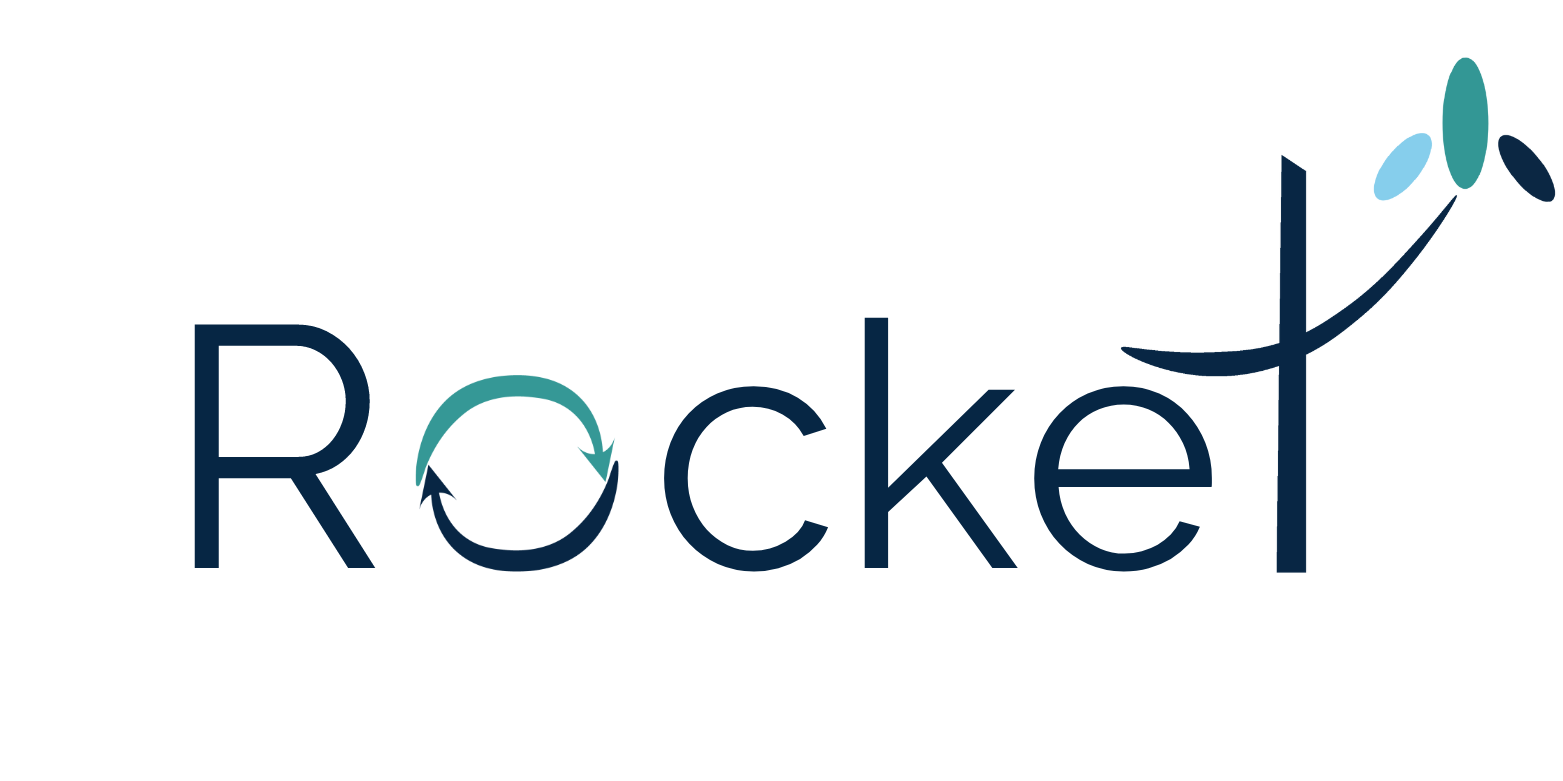

In [64]:
from IPython.display import Image

# Specify the path to your image
image_path = '/Users/camerondeardon/Documents/Development/Projects/Rocket/rocket/landing/static/landing/Rocket Logo.png'

# Display the image
Image(filename=image_path)

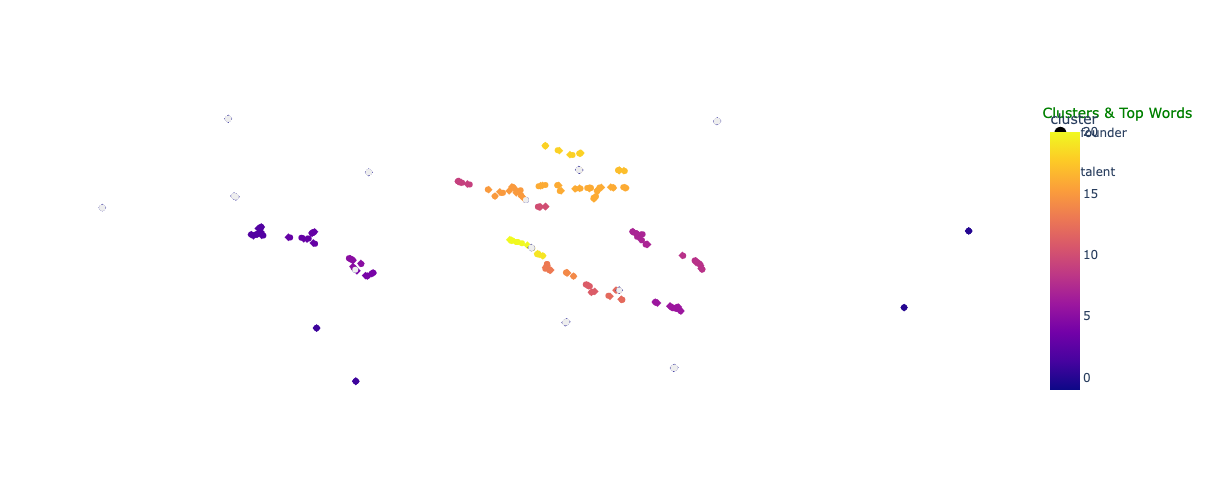

In [65]:
fig = px.scatter(df,
    x='X',
    y='Y',
    #z='vader_sentiment_score',
    color='cluster',
    symbol = 'Type',
    #size = 'length_answer',
    size_max = 50,
    hover_data=['Description', 'cluster_top_words'],
    color_discrete_sequence=list(cluster_colors.values())
    )

# for trace in fig.data:
#     trace.marker.line.color = trace.marker.color

# Adding in poorly clustered topics
unclustered_indices = df[df['cluster'] == -1].index
unclustered_df = df.loc[unclustered_indices]

"""
Add unclustered documents as a separate trace with a fixed color
"""
unclustered_trace = px.scatter(unclustered_df, x='X', y='Y',#z = 'vader_sentiment_score',
                               size_max = 2,
                               #z='bert_sentiment_score',
                               color_discrete_sequence=['#EEEEEE'], hover_data=['Description', 'cluster_top_words'],
).data[0]
fig.add_trace(unclustered_trace)


custom_legend_items = []
for cluster_label, color in cluster_colors.items():
    top_words = cluster_top_words.get(cluster_label, "Unclustered")  # Handle unclustered points
    legend_item = dict(
        name=f"Cluster {cluster_label}: {top_words}",
        marker=dict(color=color)
    )
    custom_legend_items.append(legend_item)

# Update Layout
fig.update_layout(
    showlegend=True,
    legend=dict(
        title="Clusters & Top Words",
        itemsizing='constant',
        tracegroupgap=20
    ),
    legend_title_font_color="green"
)

# Manually Set Legend Items
#fig.for_each_trace(lambda trace: trace.update(showlegend=True) if trace.name != unclustered_trace.name else ())  # Exclude the unclustered trace from the legend
#fig.update_layout(legend_title_text='Clusters & Top Words')
#fig.update_layout(legend_itemsizing='constant')
#fig.update_layout(legend_tracegroupgap=20)
#fig.update_layout(legend_title_font_color='green')
#fig.update_layout(legend_itemclick=False, legend_itemdoubleclick=False)  # Disable legend interactions




# hover_template = """
# <extra></extra>
# Nudge Content: %{customdata[1]}<br>
# Cluster: %{customdata[4]}<br>
# Cluster Colour: %{customdata[5]}
# """

# fig.update_traces(hovertemplate=hover_template)

fig.update_layout(
    showlegend=True,
    #annotations=custom_legend,
    plot_bgcolor= 'white'#'rgb(238,238,238)'#'#252d2',
)

fig.update_xaxes(title='')
fig.update_yaxes(title='')
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
rocket_logo = "rocket/landing/static/landing/Rocket Logo.png"
# Add the logo as a layout image
fig.add_layout_image(
    go.layout.Image(
        source=rocket_logo,
        x=0, y=1,  # Position at top left
        xref="paper", yref="paper",
        sizex=0.8, sizey=0.8,
        opacity=0.8,
        layer="below"
    )
)

# # bottom Logo Annotation
rocket_logo_annotation = go.layout.Image(
    source=rocket_logo,
    x=0, y=0,
    xref="paper", yref="paper",
    sizex=0.15, sizey=0.15,
    opacity=0.8
)

fig.add_layout_image(rocket_logo_annotation)

fig.update_layout(
    width=1000,
    height=500,
    autosize=False,
    margin=dict(l=50, r=50, t=100, b=100),  # Adjust margins as needed
)


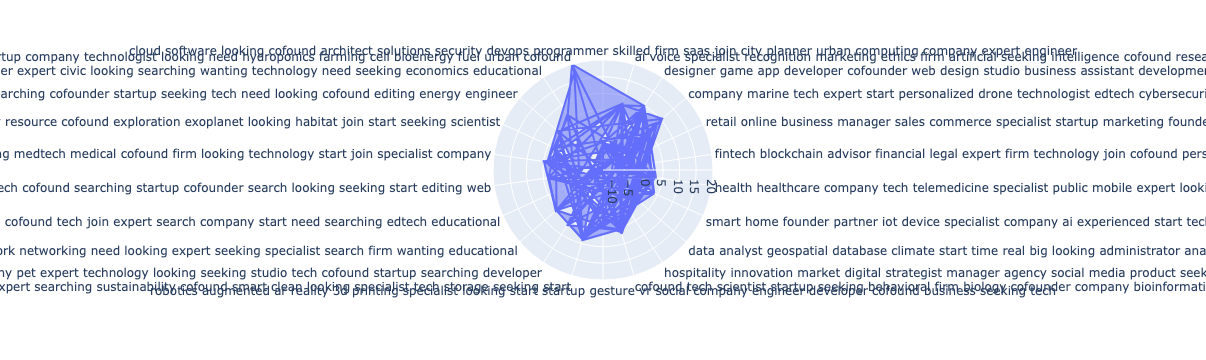

In [69]:
fig = px.line_polar(df, r='X', theta='cluster_top_words', line_close=True)
fig.update_traces(fill='toself')
fig.show()
